In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 10.5 MB/s 
     |████████████████████████████████| 15.4 MB 58.0 MB/s 
     |████████████████████████████████| 6.3 MB 24.2 MB/s 


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import geopandas as gpd
import seaborn as sn
from numpy import mean, std
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

drive.mount('/content/drive')
directory = '/content/drive/MyDrive/Data Projects/Happiness/Files'

pd.set_option("display.max_rows", None, "display.max_columns", None)

Mounted at /content/drive


# Exploratory Data Analysis
_____________________

In [3]:
df_2009 = pd.read_csv(f'{directory}/2009_Happiness.csv').drop('Unnamed: 0',axis=1)
df_2021 = pd.read_csv(f'{directory}/2021_Happiness.csv').drop('Unnamed: 0',axis=1)

#Long frame
df_Long = pd.concat([df_2009,df_2021],ignore_index=True)

### ● Happiest and Unhappiest Countries

In [4]:
#Importing global shapefile for visualization
world_country_map = gpd.read_file(f'{directory}/ne_10m_admin_0_countries_lakes.shp')
world_country_map = gpd.GeoDataFrame(world_country_map)
world_country_map2 = world_country_map.drop(world_country_map.index[172])

#Creating dataframes for the ten happiest and unhappiest countries in 2009
df_2009_top = df_2009.sort_values(by='Happiness score', ascending=False).head(10)
df_2009_bot = df_2009.sort_values(by='Happiness score', ascending=False).tail(10)

#Creating dataframes for the ten happiest and unhappiest countries in 2021
df_2021_top = df_2021.sort_values(by='Happiness score', ascending=False).head(10)
df_2021_bot = df_2021.sort_values(by='Happiness score', ascending=False).tail(10)

#Optimizing country name for visualization
df_2009_bot.loc[20,'Country name'] = 'Congo'

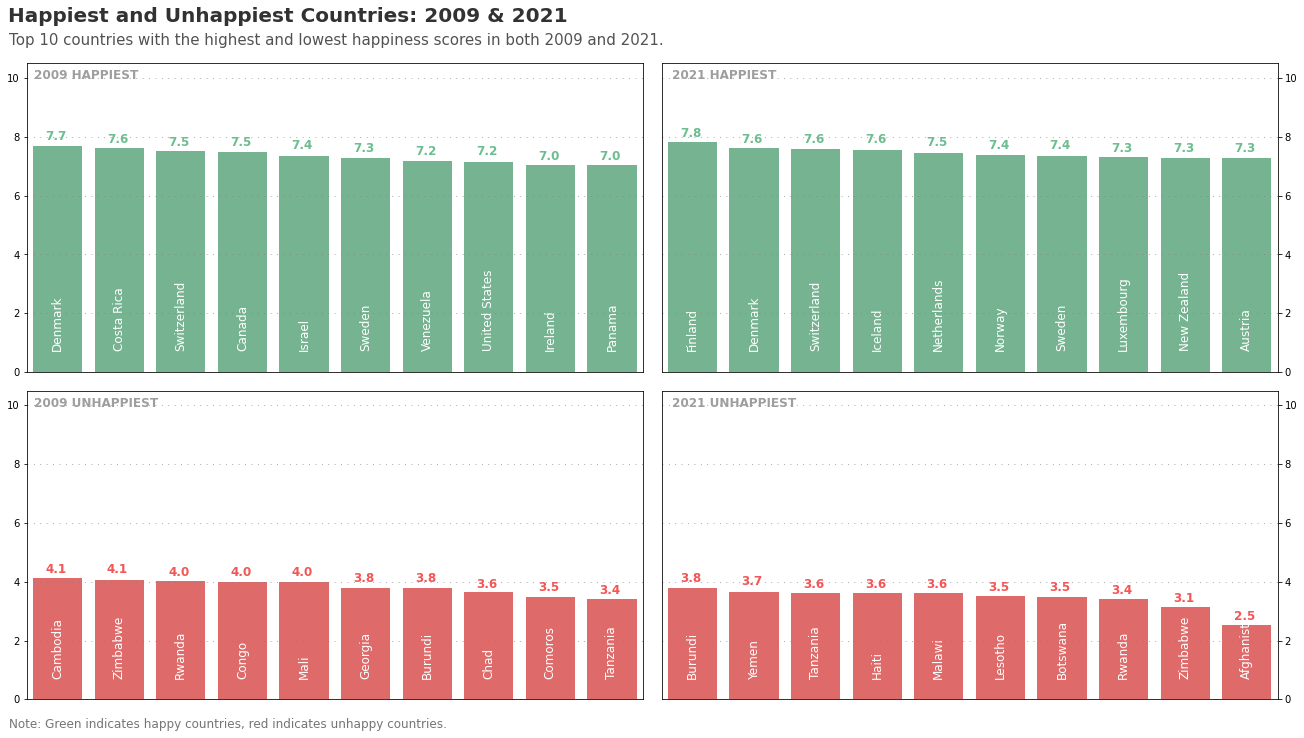

In [5]:
#Figure initialization 
ax = plt.figure(figsize=(18,9), constrained_layout=True)
gs = ax.add_gridspec(2, 2)
gs.update(hspace=0.00)

#Figure annotations
plt.figtext(0.003, 1.059,'Happiest and Unhappiest Countries: 2009 & 2021',fontfamily='sans-serif',fontsize=20,fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Top 10 countries with the highest and lowest happiness scores in both 2009 and 2021.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.023, 0.972, '2009 HAPPIEST', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.515, 0.972, '2021 HAPPIEST', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.023, 0.465, '2009 UNHAPPIEST', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.515, 0.465, '2021 UNHAPPIEST', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.004, -0.03, 'Note: Green indicates happy countries, red indicates unhappy countries.', fontsize = 12, color = '#757575')

ax1 = ax.add_subplot(gs[0, 0])
ax1.set_title('')
sn.barplot(x = df_2009_top['Country name'], y = df_2009_top['Happiness score'], color='#6CBD90')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax1.set_ylim(0,10.5)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.xaxis.tick_top()
ax1.tick_params(axis="x", direction='in', pad=-288, width=0, tickdir="in", labelsize='large', labelcolor='#ffffff', rotation=90)
ax1 = plt.gca()
yticks = ax1.yaxis.get_major_ticks()
for i, v in enumerate(round(df_2009_top['Happiness score'],1)):
    ax1.text(i - .2, v+.2, str(v), color='#6CBD90', fontweight='bold', rotation=0, fontsize=12)

ax2 = ax.add_subplot(gs[0, 1])
ax2.set_title('')
sn.barplot(x = df_2021_top['Country name'], y = df_2021_top['Happiness score'], color='#6CBD90')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax2.set_ylim(0,10.5)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.tick_params(axis="x", direction='in', pad=-288, width=0, tickdir="in", labelsize='large', labelcolor='#ffffff', rotation=90)
ax2 = plt.gca()
yticks = ax2.yaxis.get_major_ticks() 
for i, v in enumerate(round(df_2021_top['Happiness score'],1)):
    ax2.text(i - .2, v+.2, str(v), color='#6CBD90', fontweight='bold', rotation=0, fontsize=12)


ax3 = ax.add_subplot(gs[1, 0])
ax3.set_title('')
sn.barplot(x = df_2009_bot['Country name'], y = df_2009_bot['Happiness score'], color='#f25757')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax3.set_ylim(0,10.5)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.xaxis.tick_top()
ax3.tick_params(axis="x", direction='in', pad=-288, width=0, tickdir="in", labelsize='large', labelcolor='#ffffff', rotation=90)
ax3 = plt.gca()
yticks = ax3.yaxis.get_major_ticks()
for i, v in enumerate(round(df_2009_bot['Happiness score'],1)):
    ax3.text(i - .2, v+.2, str(v), color='#f25757', fontweight='bold', rotation=0, fontsize=12)

ax4 = ax.add_subplot(gs[1, 1])
ax4.set_title('')
sn.barplot(x = df_2021_bot['Country name'], y = df_2021_bot['Happiness score'], color='#f25757')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax4.set_ylim(0,10.5)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.xaxis.tick_top()
ax4.yaxis.tick_right()
ax4.tick_params(axis="x", direction='in', pad=-288, width=0, tickdir="in", labelsize='large', labelcolor='#ffffff', rotation=90)
ax4 = plt.gca()
yticks = ax4.yaxis.get_major_ticks() 
for i, v in enumerate(round(df_2021_bot['Happiness score'],1)):
    ax4.text(i - .2, v+.2, str(v), color='#f25757', fontweight='bold', rotation=0, fontsize=12)

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Top Happiness 2009 & 2021.png' , bbox_inches="tight", dpi=600)

### ● Happy Vs. Unhappy Countries

In [6]:
#Pivot Table of global happiness score means
Hap_Table = pd.pivot_table(df_Long, values=['Happiness score'], index=['Year'], aggfunc=np.mean)
print('Mean global happiness score in 2009 and 2021:')
Hap_Table

Mean global happiness score in 2009 and 2021:


,Happiness score
Year,
2009,5.453832
2021,5.527169


In [7]:
#Creating dataframes for countries above and below the happiness mean
df_2009_above_mean = df_2009[df_2009['Happiness score'] >= df_2009["Happiness score"].mean()]
df_2009_below_mean = df_2009[df_2009['Happiness score'] < df_2009["Happiness score"].mean()]

#Merging and converting dataframes into GeoDataFrames
geo_df_2009_above_mean = world_country_map.merge(df_2009_above_mean, left_on='ISO_A2', right_on='Country code')
geo_df_2009_below_mean = world_country_map.merge(df_2009_below_mean, left_on='ISO_A2', right_on='Country code')
geo_df_2009_above_mean = gpd.GeoDataFrame(geo_df_2009_above_mean)
geo_df_2009_below_mean = gpd.GeoDataFrame(geo_df_2009_below_mean)

#Creating dataframes for countries above and below the happiness mean
df_2021_above_mean = df_2021[df_2021['Happiness score'] >= df_2021["Happiness score"].mean()]
df_2021_below_mean = df_2021[df_2021['Happiness score'] < df_2021["Happiness score"].mean()]

#Merging and converting dataframes into GeoDataFrames
geo_df_2021_above_mean = world_country_map.merge(df_2021_above_mean, left_on='ISO_A2', right_on='Country code')
geo_df_2021_below_mean = world_country_map.merge(df_2021_below_mean, left_on='ISO_A2', right_on='Country code')
geo_df_2021_above_mean = gpd.GeoDataFrame(geo_df_2021_above_mean)
geo_df_2021_below_mean = gpd.GeoDataFrame(geo_df_2021_below_mean)

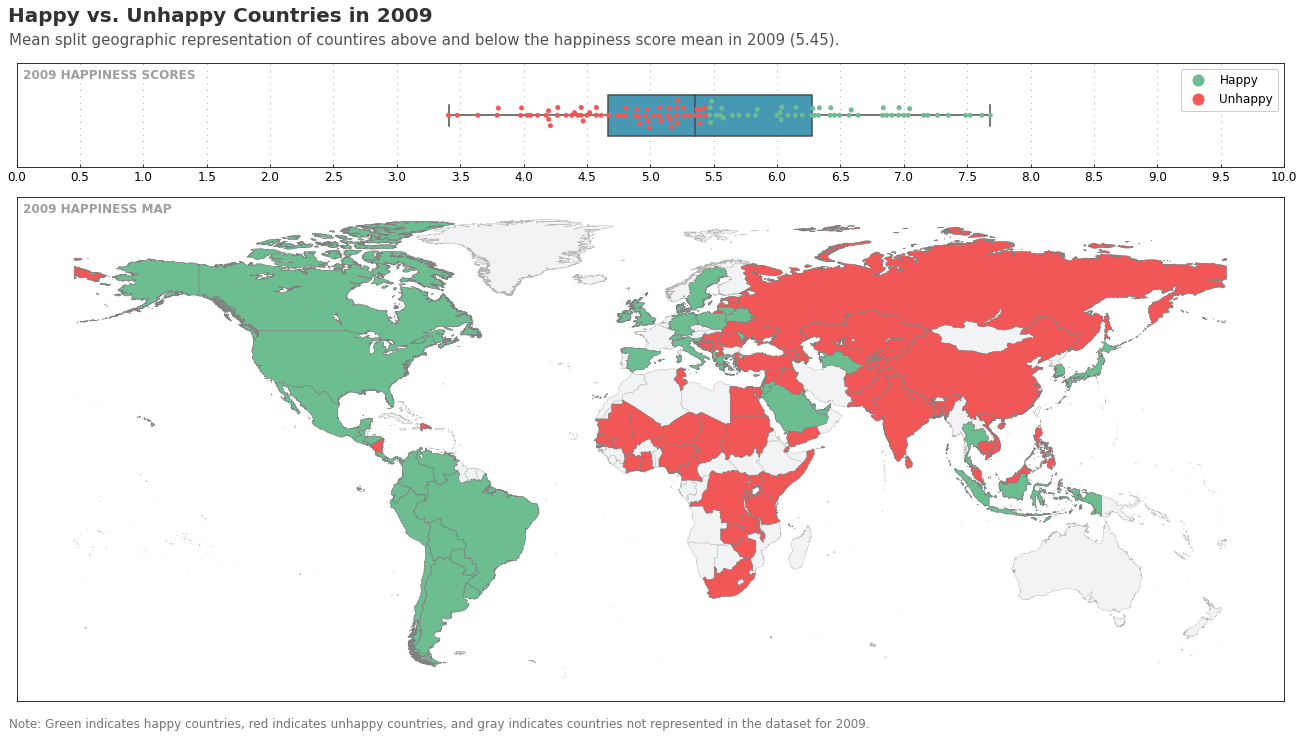

In [8]:
#Figure initialization 
ax = plt.figure(figsize=(18,9), constrained_layout=True)
gs = ax.add_gridspec(6, 1)

#Figure annotations
plt.figtext(0.003, 1.059, 'Happy vs. Unhappy Countries in 2009',fontfamily='sans-serif',fontsize=20,fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Mean split geographic representation of countires above and below the happiness score mean in 2009 (5.45).', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.004, -0.03, 'Note: Green indicates happy countries, red indicates unhappy countries, and gray indicates countries not represented in the dataset for 2009.', fontsize = 12, color = '#757575')
plt.figtext(0.0145, 0.972, '2009 HAPPINESS SCORES', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.0145, 0.765, '2009 HAPPINESS MAP', fontsize = 12, fontweight='bold', color = '#9e9e9e')

legend_elements = [Line2D([0], [0],marker='o', markersize=11, color='#6CBD90', lw=0, ls='', label='Happy'),
                   Line2D([0], [0],marker='o', markersize=11, color='#f25757', lw=0, ls='', label='Unhappy')]

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0, 0])
ax1.set_title('')
sn.boxplot(x='Happiness score', data=df_2009, orient='h', color='#35a1c4', width=0.4, showfliers = False)
sn.swarmplot(x='Happiness score', data=df_2009_above_mean, color='#6CBD90')
sn.swarmplot(x='Happiness score', data=df_2009_below_mean, color='#f25757')
ax1.legend(handles=legend_elements, loc="upper right", ncol=1, framealpha=1, fontsize=12, markerscale=1); 
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis="x", direction='in',tickdir="in", labelsize='large', labelcolor='#000000')
plt.xticks(np.arange(0,10.5, 0.5))
plt.yticks([]);


# Plot 2 specifications
ax2 = ax.add_subplot(gs[1:, 0])
ax2.set_title('')
world_country_map2.plot(ax=ax2, color='#F2F3F4', edgecolor='0.7', linewidth=0.4)
geo_df_2009_above_mean.plot(linewidth=0.6, ax=ax2, edgecolor='.5', color = '#6CBD90')
geo_df_2009_below_mean.plot(linewidth=0.6, ax=ax2, edgecolor='.5', color = '#f25757')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.xticks([])
plt.yticks([])

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Happy Vs Unhappy 2009.png' , bbox_inches="tight", dpi=600)

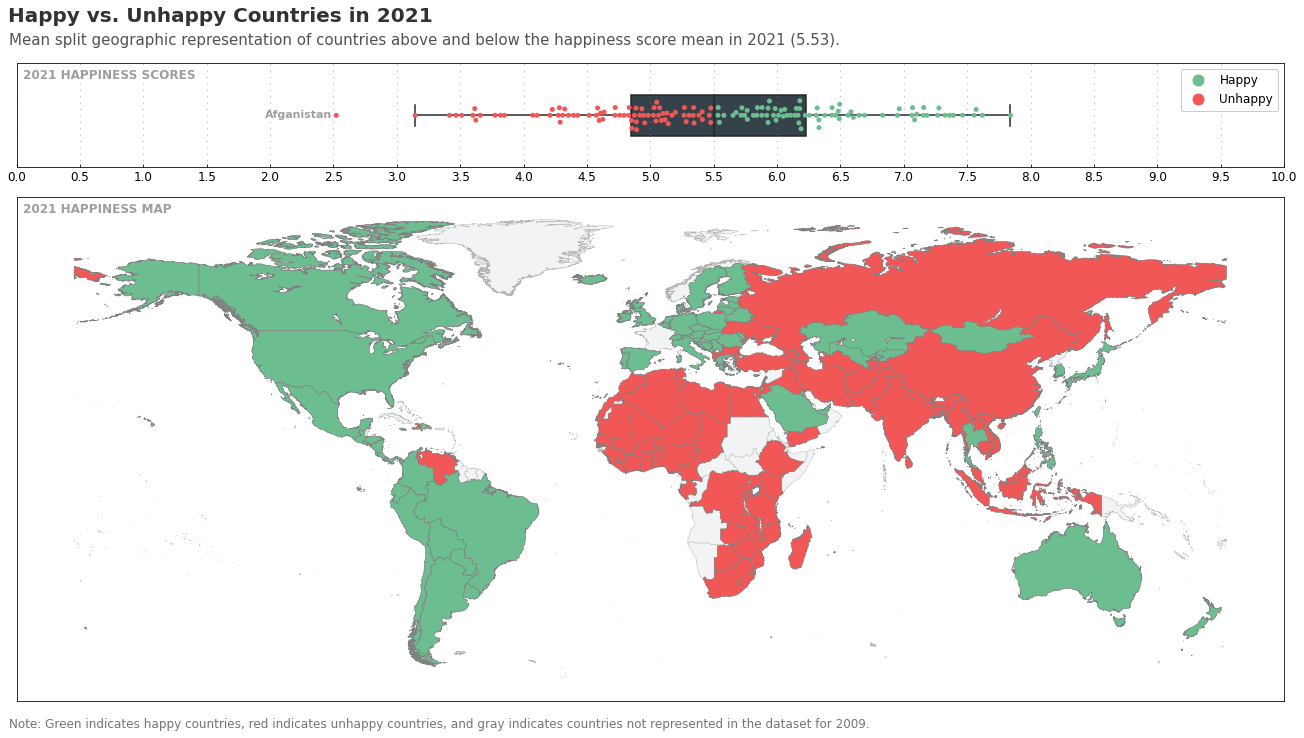

In [9]:
#Figure initialization 
ax = plt.figure(figsize=(18,9), constrained_layout=True)
gs = ax.add_gridspec(6, 1)

#Figure annotations
plt.figtext(0.003, 1.059, 'Happy vs. Unhappy Countries in 2021',fontfamily='sans-serif',fontsize=20,fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Mean split geographic representation of countries above and below the happiness score mean in 2021 (5.53).', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.004, -0.03, 'Note: Green indicates happy countries, red indicates unhappy countries, and gray indicates countries not represented in the dataset for 2009.', fontsize = 12, color = '#757575')
plt.figtext(0.201, 0.9104, 'Afganistan', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.0145, 0.972, '2021 HAPPINESS SCORES', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.0145, 0.765, '2021 HAPPINESS MAP', fontsize = 12, fontweight='bold', color = '#9e9e9e')

legend_elements = [Line2D([0], [0],marker='o', markersize=11, color='#6CBD90', lw=0, ls='', label='Happy'),
                   Line2D([0], [0],marker='o', markersize=11, color='#f25757', lw=0, ls='', label='Unhappy')]

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0, 0])
ax1.set_title('')
sn.boxplot(x='Happiness score', data=df_2021, orient='h', color='#33424d', width=0.4, showfliers = False)
sn.swarmplot(x='Happiness score', data=df_2021_above_mean, color='#6CBD90')
sn.swarmplot(x='Happiness score', data=df_2021_below_mean, color='#f25757')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
ax1.legend(handles=legend_elements, loc="upper right", ncol=1, framealpha=1, fontsize=12, markerscale=1); 
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis="x", direction='in',tickdir="in", labelsize='large', labelcolor='#000000')
plt.xticks(np.arange(0,10.5, 0.5))
plt.yticks([]);


# Plot 2 specifications
ax2 = ax.add_subplot(gs[1:, 0])
ax2.set_title('')
world_country_map2.plot(ax=ax2, color='#F2F3F4', edgecolor='0.7', linewidth=0.4)
geo_df_2021_above_mean.plot(linewidth=0.6, ax=ax2, edgecolor='.5', color = '#6CBD90')
geo_df_2021_below_mean.plot(linewidth=0.6, ax=ax2, edgecolor='.5', color = '#f25757')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.xticks([])
plt.yticks([])

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Happy Vs Unhappy 2021.png' , bbox_inches="tight", dpi=600)

### ● Continental Happiness

In [10]:
#Pivot Table of continental happiness scores
Cont_Hap_Table = pd.pivot_table(df_Long, values=['Happiness score'], index=['Continent', 'Year'], aggfunc=np.mean)
print('Continental Happiness Score Means:')
Cont_Hap_Table

Continental Happiness Score Means:


Happiness score
Continent         Year                 
Africa            2009         4.421240
                  2021         4.534024
Asia              2009         5.313487
                  2021         5.340364
Australia/Oceania 2021         7.230000
Europe            2009         5.837241
                  2021         6.422436
North America     2009         6.636700
                  2021         6.123000
South America     2009         6.287900
                  2021         5.873900

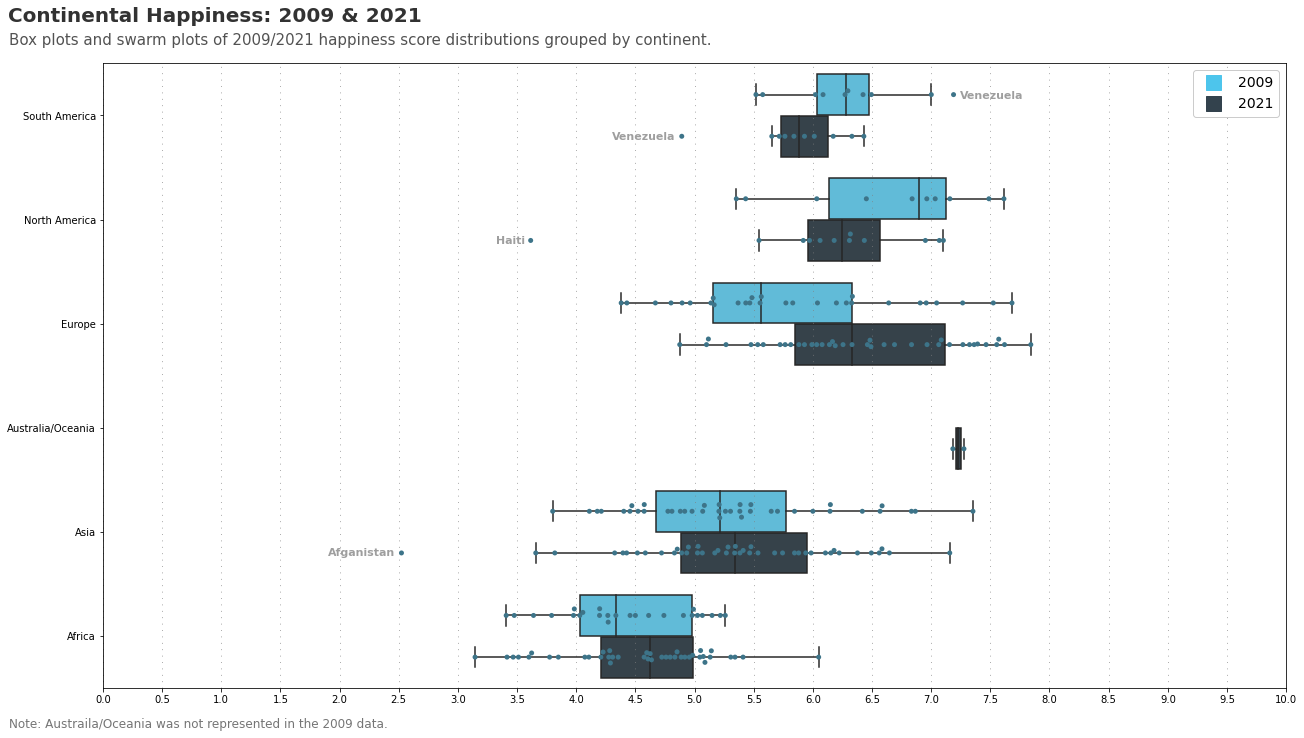

In [11]:
#Figure initialization 
ax = plt.figure(figsize=(18,9), constrained_layout=True)

legend_elements = [Line2D([0], [0],marker='s', markersize=15, color='#4dc5ec', lw=0, ls='', label='2009'),
                   Line2D([0], [0],marker='s', markersize=15, color='#33424d', lw=0, ls='', label='2021')]

#Figure annotations
plt.figtext(0.003, 1.059, 'Continental Happiness: 2009 & 2021',fontfamily='sans-serif',fontsize=20,fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Box plots and swarm plots of 2009/2021 happiness score distributions grouped by continent.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.7372, 0.9399, 'Venezuela', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.469, 0.8779, 'Venezuela', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.3795, 0.7172, 'Haiti', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.2499, 0.235, 'Afganistan', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.004, -0.03, 'Note: Austraila/Oceania was not represented in the 2009 data.', fontsize = 12, color = '#757575')

#Color Palettes
palette = {2009:'#4dc5ec', 2021:'#33424d'}
palette2 = {2009:'#3d7489', 2021:'#3d7489'}

#Plot 1 specifications
df_Long.sort_values('Continent', ascending=False, inplace=True)
ax1 = ax.add_subplot()
sn.boxplot(x='Happiness score', y='Continent', data=df_Long, hue='Year', orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Happiness score', y='Continent', data=df_Long, hue='Year', dodge=True, palette=palette2)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7));
ax1.legend(handles=legend_elements, loc="upper right", ncol=1, framealpha=1, fontsize=14, markerscale=1);  
plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.xticks(np.arange(0,10.5, 0.5));

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Continental Happiness 2009&2021.png' , bbox_inches="tight", dpi=600)

## Comparing 2009 and 2021 Happiness

### ● Association Between 2009 and 2021 Happiness

In [12]:
#Combining both years of data
df_all = pd.merge(df_2009, df_2021, on = ['Country code'], how = 'outer')

#Removing countires not present in both years
df_all_reg = df_all[df_all['Happiness score_x'].notna()]
df_all_reg = df_all_reg[df_all['Happiness score_y'].notna()]

#Calculating correlation between 2009 and 2021 happiness scores
corr, _ = pearsonr(df_all_reg['Happiness score_x'], df_all_reg['Happiness score_y'])
HAP_corr = 'r = ' + str(round(corr, 2))
print('2009 & 2021 Happiness Correlation:', HAP_corr)

#Regression between 2009 and 2021 happiness scores for visualization
X = df_all_reg.iloc[:, 1].values.reshape(-1, 1)
Y = df_all_reg.iloc[:, 13].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

2009 & 2021 Happiness Correlation: r = 0.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


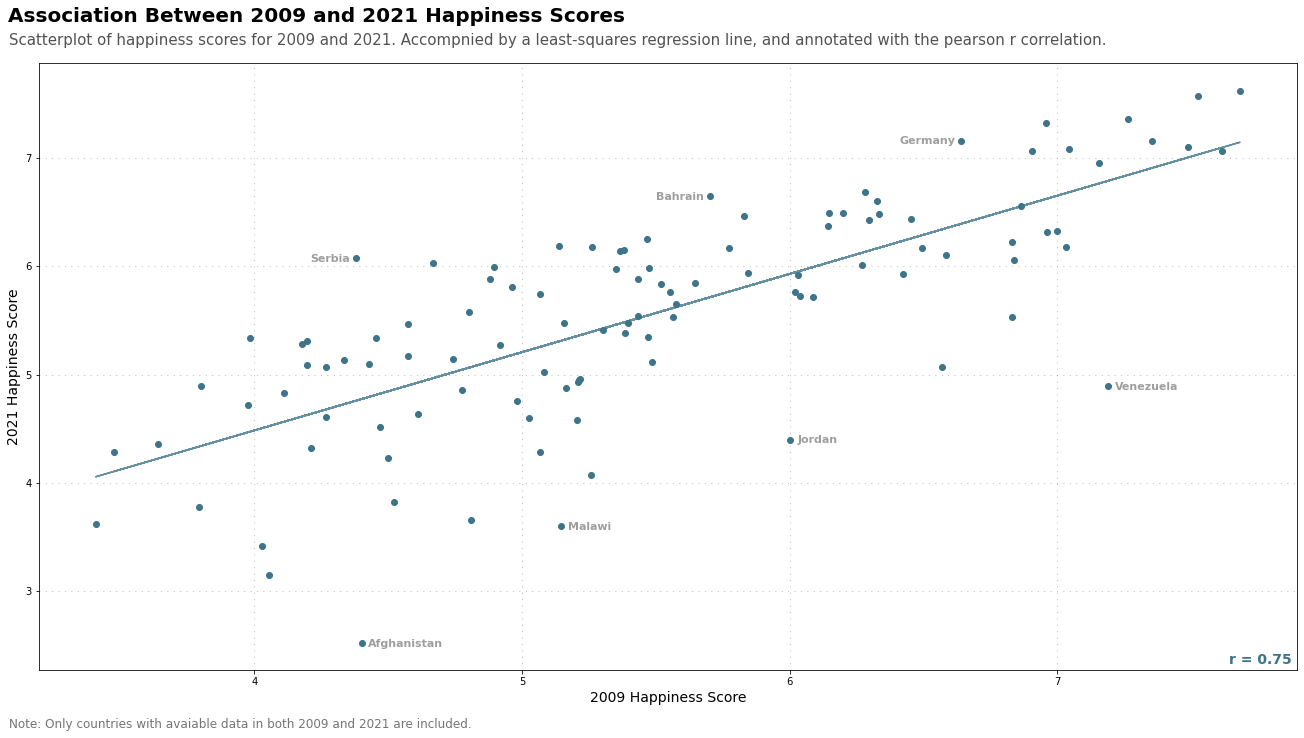

In [13]:
#Figure initialization
ax = plt.figure(figsize = (18, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059, 'Association Between 2009 and 2021 Happiness Scores', fontsize = 20, fontweight='bold', fontfamily='sans-serif')
plt.figtext(0.004, 1.024, 'Scatterplot of happiness scores for 2009 and 2021. Accompnied by a least-squares regression line, and annotated with the pearson r correlation.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.004, -0.03, 'Note: Only countries with avaiable data in both 2009 and 2021 are included.', fontsize = 12, color = '#757575')
plt.figtext(0.8571, 0.4919, 'Venezuela', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.612, 0.4102, 'Jordan', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.4348, 0.276, 'Malawi', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.2805, 0.0953, 'Afghanistan', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.236, 0.689, 'Serbia', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.503, 0.7853, 'Bahrain', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.6907, 0.8705, 'Germany', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.945, 0.0691, HAP_corr, fontsize = 14, fontweight='bold', color = '#3d7489')

#Plot 1 specifications
ax1 = ax.add_subplot()
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.plot(X, Y_pred, color='#3d7489', alpha = 0.8, zorder = 1)
plt.scatter(df_all['Happiness score_x'],df_all['Happiness score_y'], color='#3d7489', zorder = 2)
plt.xlabel('2009 Happiness Score', fontsize = 14, fontfamily='sans-serif')
plt.ylabel('2021 Happiness Score', fontsize = 14, fontfamily='sans-serif');

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Happiness Associations.png' , bbox_inches="tight", dpi=600)

### ● Changes in Happiness From 2009 to 2021

In [14]:
#Creating dataframes for each continent in 2009 and 2021
df_2009_NA = df_2009[df_2009['Continent'] == 'North America']
df_2021_NA = df_2021[df_2021['Continent'] == 'North America']
df_2009_SA = df_2009[df_2009['Continent'] == 'South America']
df_2021_SA = df_2021[df_2021['Continent'] == 'South America']
df_2009_EU = df_2009[df_2009['Continent'] == 'Europe']
df_2021_EU = df_2021[df_2021['Continent'] == 'Europe']
df_2009_AF = df_2009[df_2009['Continent'] == 'Africa']
df_2021_AF = df_2021[df_2021['Continent'] == 'Africa']
df_2009_AS = df_2009[df_2009['Continent'] == 'Asia']
df_2021_AS = df_2021[df_2021['Continent'] == 'Asia']

#Calculating percent changes in happiness for each continent
print ('Global Continental Percent Changes in Happiness Fron 2009 to 2021:\n')
ALL_change = str(round((((df_2021['Happiness score'].mean() - df_2009['Happiness score'].mean()) / (df_2009['Happiness score'].mean())) * 100) , 2)) + '%'
print ('Global:', ALL_change, '\n')
NA_change = str(round((((df_2021_NA['Happiness score'].mean() - df_2009_NA['Happiness score'].mean()) / (df_2009_NA['Happiness score'].mean())) * 100) , 2)) + '%'
print ('North America:', NA_change, '\n')
SA_change = str(round((((df_2021_SA['Happiness score'].mean() - df_2009_SA['Happiness score'].mean()) / (df_2009_SA['Happiness score'].mean())) * 100) , 2)) + '%'
print ('South America:', SA_change, '\n')
EU_change = str(round((((df_2021_EU['Happiness score'].mean() - df_2009_EU['Happiness score'].mean()) / (df_2009_EU['Happiness score'].mean())) * 100) , 2)) + '%'
print ('Europe:', EU_change, '\n')
AF_change = str(round((((df_2021_AF['Happiness score'].mean() - df_2009_AF['Happiness score'].mean()) / (df_2009_AF['Happiness score'].mean())) * 100) , 2)) + '%'
print ('Africa:', AF_change, '\n')
AS_change = str(round((((df_2021_AS['Happiness score'].mean() - df_2009_AS['Happiness score'].mean()) / (df_2009_AS['Happiness score'].mean())) * 100) , 2)) + '%'
print ('Asia:', AS_change, '\n')

Global Continental Percent Changes in Happiness Fron 2009 to 2021:

Global: 1.34% 

North America: -7.74% 

South America: -6.58% 

Europe: 10.03% 

Africa: 2.55% 

Asia: 0.51% 



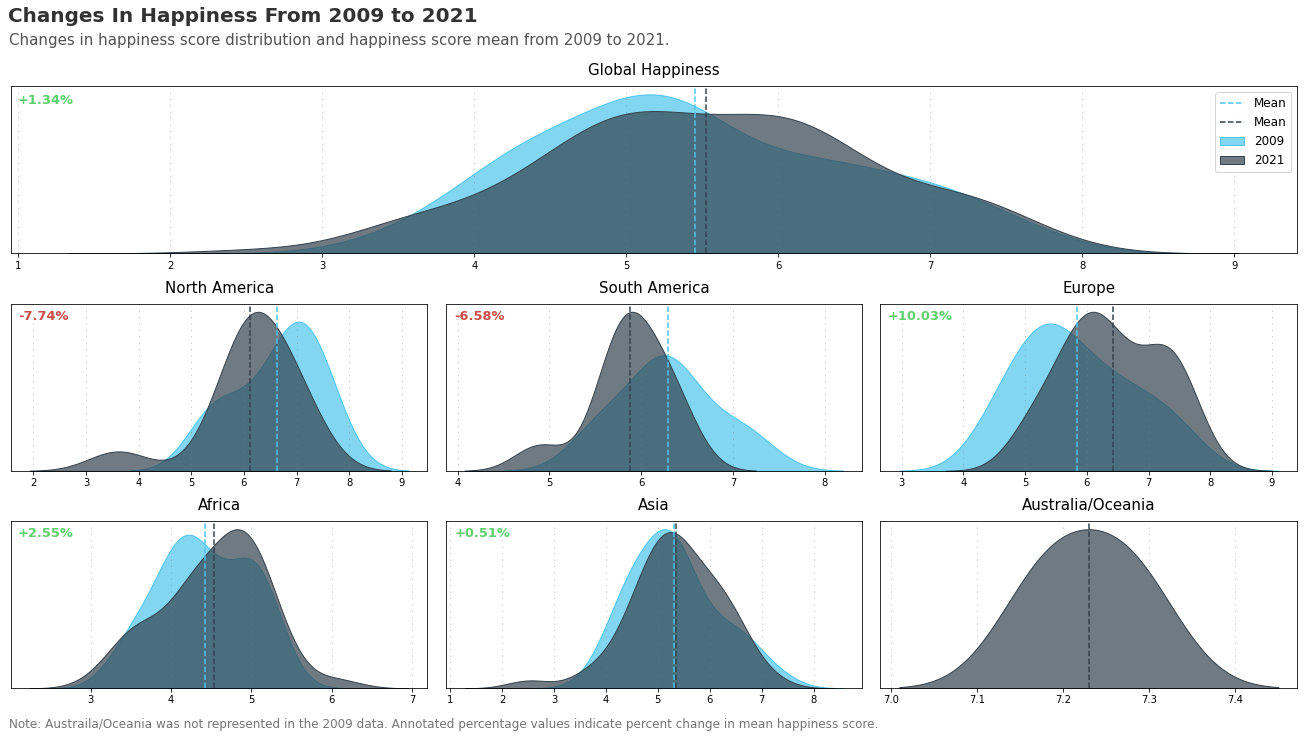

In [15]:
#Figure initialization
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(3, 3)
gs.update(wspace=0.03, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, 'Changes In Happiness From 2009 to 2021', fontfamily='sans-serif',fontsize=20, fontweight='bold',color='#323232')
plt.figtext(0.004, 1.024, 'Changes in happiness score distribution and happiness score mean from 2009 to 2021.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.0105, 0.932, '+1.34%', fontfamily='sans-serif', fontsize = 13, fontweight='bold',color = '#5ED06C')
plt.figtext(0.0105, 0.60, '-7.74%', fontfamily='sans-serif', fontsize = 13, fontweight='bold',color = '#CB4D47')
plt.figtext(0.3475, 0.60, '-6.58%', fontfamily='sans-serif', fontsize = 13, fontweight='bold',color = '#CB4D47')
plt.figtext(0.682, 0.60, '+10.03%', fontfamily='sans-serif', fontsize = 13, fontweight='bold', color = '#5ED06C')
plt.figtext(0.0105, 0.265, '+2.55%', fontfamily='sans-serif', fontsize = 13, fontweight='bold', color = '#5ED06C')
plt.figtext(0.3475, 0.265, '+0.51%', fontfamily='sans-serif', fontsize = 13, fontweight='bold',  color = '#5ED06C')
plt.figtext(0.004, -0.030, 'Note: Austraila/Oceania was not represented in the 2009 data. Annotated percentage values indicate percent change in mean happiness score.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0, :])
plt.title('Global Happiness', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Happiness score'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Happiness score'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(['Mean', 'Mean', '2009', '2021'], loc="upper right", ncol = 1, frameon = True, fontsize = 12)

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1, 0])
plt.title('North America', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009_NA['Happiness score'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009_NA['Happiness score'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021_NA['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021_NA['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 3 specifications
ax3 = ax.add_subplot(gs[1, 1])
plt.title('South America', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009_SA['Happiness score'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009_SA['Happiness score'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021_SA['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021_SA['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 4 specifications
ax4 = ax.add_subplot(gs[1, 2])
plt.title('Europe', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009_EU['Happiness score'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009_EU['Happiness score'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021_EU['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021_EU['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 5 specifications
ax5 = ax.add_subplot(gs[2, 0])
plt.title('Africa', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009_AF['Happiness score'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009_AF['Happiness score'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021_AF['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021_AF['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 6 specifications
ax6 = ax.add_subplot(gs[2, 1])
plt.title('Asia', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009_AS['Happiness score'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009_AS['Happiness score'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021_AS['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021_AS['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 7 specifications
df_2021_OC = df_2021[df_2021['Continent code'] == 'OC']
ax7 = ax.add_subplot(gs[2, 2])
plt.title('Australia/Oceania', size = 15, y = 1.03, fontname = 'sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2021_OC['Happiness score'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021_OC['Happiness score'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([]);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Happiness Change 2009 to 2021.png' , bbox_inches="tight", dpi=600)

### ● Largest Changes in Happiness From 2009 to 2021

In [16]:
#Calculating changes in happiness and sorting out highest increases and decreases
df_all["Happiness Change"] = df_all["Happiness score_y"] - df_all["Happiness score_x"]
df_all_sorted = df_all.sort_values(by='Happiness Change', ascending=False)
df_all_poschange = df_all_sorted.head(10)
df_all_sorted = df_all.sort_values(by='Happiness Change', ascending=True)
df_all_negchange = df_all_sorted.head(10)

#Optimizing country name for visualization
df_all_poschange.loc[20,'Country name_y'] = 'Congo'

#Merging and converting increases and decreases dataframes to GeoDataFrames
geo_df_all_poschange = world_country_map.merge(df_all_poschange, left_on='ISO_A2', right_on='Country code')
geo_df_all_negchange = world_country_map.merge(df_all_negchange, left_on='ISO_A2', right_on='Country code')
geo_df_all_poschange = gpd.GeoDataFrame(geo_df_all_poschange)
geo_df_all_negchange = gpd.GeoDataFrame(geo_df_all_negchange)

In [17]:
df_all_poschange

,Country name_x,Happiness score_x,Logged GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,Generosity_x,Perceptions of corruption_x,Country code,Continent code_x,Continent_x,Year_x,Country name_y,Happiness score_y,Logged GDP per capita_y,Social support_y,Healthy life expectancy_y,Freedom to make life choices_y,Generosity_y,Perceptions of corruption_y,Continent code_y,Continent_y,Year_y,Happiness Change
84,Serbia,4.380,9.568,0.770,66.00,0.373,-0.178,0.961,RS,EU,Europe,2009.0,Serbia,6.078,9.787,0.873,68.600,0.778,0.002,0.835,EU,Europe,2021.0,1.698
54,Latvia,4.669,9.975,0.807,64.24,0.437,-0.180,0.942,LV,EU,Europe,2009.0,Latvia,6.032,10.315,0.927,67.100,0.715,-0.162,0.800,EU,Europe,2021.0,1.363
20,Democratic Republic of the Congo,3.984,6.728,0.733,49.34,0.556,-0.022,0.824,CD,AF,Africa,2009.0,Congo,5.342,8.117,0.636,58.221,0.695,-0.068,0.745,AF,Africa,2021.0,1.358
47,Ivory Coast,4.197,8.209,0.667,45.78,0.760,-0.153,0.902,CI,AF,Africa,2009.0,Ivory Coast,5.306,8.551,0.644,50.114,0.741,-0.016,0.794,AF,Africa,2021.0,1.109
3,Armenia,4.178,9.111,0.680,65.10,0.441,-0.214,0.882,AM,AS,Asia,2009.0,Armenia,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,AS,Asia,2021.0,1.105
40,Hungary,4.895,10.097,0.901,65.40,0.464,-0.125,0.915,HU,EU,Europe,2009.0,Hungary,5.992,10.358,0.943,68.000,0.755,-0.186,0.876,EU,Europe,2021.0,1.097
33,Georgia,3.801,9.116,0.544,64.88,0.495,-0.233,0.535,GE,AS,Asia,2009.0,Georgia,4.891,9.585,0.671,64.300,0.783,-0.238,0.655,AS,Asia,2021.0,1.090
31,Estonia,5.138,10.144,0.874,66.24,0.611,-0.230,0.793,EE,EU,Europe,2009.0,Estonia,6.189,10.481,0.941,68.800,0.909,-0.106,0.527,EU,Europe,2021.0,1.051
76,Philippines,4.880,8.632,0.775,60.40,0.874,0.004,0.805,PH,AS,Asia,2009.0,Philippines,5.880,9.076,0.830,62.000,0.917,-0.097,0.742,AS,Asia,2021.0,1.000
5,Bahrain,5.701,10.709,0.904,65.94,0.896,0.037,0.506,BH,AS,Asia,2009.0,Bahrain,6.647,10.669,0.862,69.495,0.925,0.089,0.722,AS,Asia,2021.0,0.946


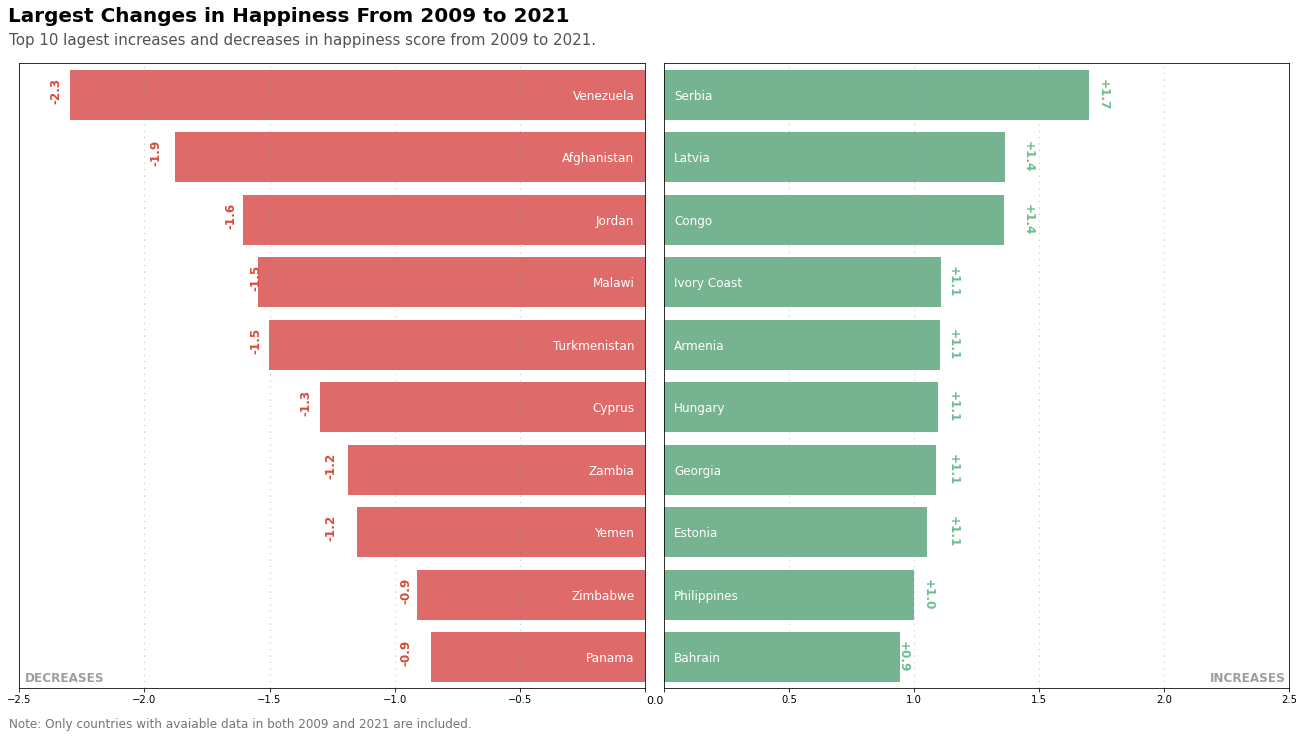

In [18]:
#Figure initialization
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(1, 2)
gs.update(wspace=-1.5, hspace=0)

#Figure annotations
plt.figtext(0.003, 1.059, 'Largest Changes in Happiness From 2009 to 2021', fontsize = 20, fontweight='bold', fontfamily='sans-serif')
plt.figtext(0.004, 1.024, 'Top 10 lagest increases and decreases in happiness score from 2009 to 2021.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.4955, 0.007, '0.0', fontsize = 11, color = '#000000')
plt.figtext(0.0162, 0.041, 'DECREASES', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.93, 0.041, 'INCREASES', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.004, -0.03, 'Note: Only countries with avaiable data in both 2009 and 2021 are included.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0, 1])
ax1.set_title('')
sn.barplot(x = df_all_poschange['Happiness Change'], y = df_all_poschange['Country name_y'], color='#6CBD90')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
ax1.set_xlim(0,2.5)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.yaxis.tick_right()
ax1.tick_params(axis="y", direction='in', pad=-615, width=0, tickdir="in", labelsize='large', labelcolor='#ffffff')
ax1 = plt.gca()
xticks = ax1.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)
for i, v in enumerate(round(df_all_poschange['Happiness Change'],1)):
    ax1.text(v + .031, i + .20, str(f'+{v}'), color='#6CBD90', fontweight='bold', rotation=270, fontsize=12)

#Plot 2 specifications
ax1 = ax.add_subplot(gs[0, 0])
ax1.set_title('')
sn.barplot(x = df_all_negchange['Happiness Change'], y = df_all_negchange['Country name_y'], color='#f25757')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
ax1.set_xlim(-2.5, 0)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis="y", direction='in', pad=-615, width=0, tickdir="in", labelsize='large', labelcolor='#ffffff')
ax1 = plt.gca()
xticks = ax1.xaxis.get_major_ticks() 
xticks[5].label1.set_visible(False)
for i, v in enumerate(round(df_all_negchange['Happiness Change'],1)):
    ax1.text(v - 0.08, i + 0.1, str(v), color='#D74B3A', fontweight='bold', rotation=90, fontsize=12)

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Biggest Happiness Movers.png' , bbox_inches="tight", dpi=600)

## Social Factors

### ● Social Factor Means

In [19]:
#Pivot table for social facotor means by year
SF_Table_Global = pd.pivot_table(df_Long, values=['Social support', 'Generosity', 'Logged GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption'], index=['Year'], aggfunc=np.mean)
print('Global Social Factor Means:')
SF_Table_Global

Global Social Factor Means:


,Freedom to make life choices,Generosity,Healthy life expectancy,Logged GDP per capita,Perceptions of corruption,Social support
Year,,,,,,
2009,0.689036,-0.007214,62.418928,9.266089,0.761527,0.818973
2021,0.791074,-0.016973,65.000770,9.432980,0.726169,0.814703


In [20]:
#Pivot table for social facotor means by continent and year
SF_Table_Cont = pd.pivot_table(df_Long, values=['Social support', 'Generosity', 'Logged GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption'], index=['Continent', 'Year'], aggfunc=np.mean)
print('Continental Social Factor Means in 2009 and 2021:')
SF_Table_Cont

Continental Social Factor Means in 2009 and 2021:


Freedom to make life choices  Generosity  \
Continent         Year                                             
Africa            2009                      0.655560   -0.004649   
                  2021                      0.718659   -0.007049   
Asia              2009                      0.704822    0.000051   
                  2021                      0.802591    0.015795   
Australia/Oceania 2021                      0.921500    0.146500   
Europe            2009                      0.658034   -0.029655   
                  2021                      0.822308   -0.052410   
North America     2009                      0.761900    0.068000   
                  2021                      0.854167   -0.012250   
South America     2009                      0.728200   -0.052100   
                  2021                      0.813700   -0.102000   

                        Healthy life expectancy  Logged GDP per capita  \
Continent         Year                                                   
Africa            2009                51.770357               7.937724   
                  2021                56.966463               8.224561   
Asia              2009                63.473101               9.338872   
                  2021                66.097091               9.560068   
Australia/Oceania 2021                73.650000              10.719500   
Europe            2009                67.664448              10.177586   
                  2021                70.394769              10.451103   
North America     2009                66.454000               9.494900   
                  2021                67.272333               9.477333   
South America     2009                65.682000               9.431000   
                  2021                67.625300               9.547100   

                        Perceptions of corruption  Social support  
Continent         Year                                             
Africa            2009                   0.795480        0.747719  
                  2021                   0.767293        0.700317  
Asia              2009                   0.732309        0.796103  
                  2021                   0.727136        0.816682  
Australia/Oceania 2021                   0.342000        0.944000  
Europe            2009                   0.772501        0.877310  
                  2021                   0.676179        0.907821  
North America     2009                   0.737800        0.863300  
                  2021                   0.736000        0.832083  
South America     2009                   0.782500        0.872800  
                  2021                   0.813300        0.865100

### ● Social Factor Associations

In [21]:
#Creating a dataframe for correlation heatmap with unused columns dropped
df_all_corr = df_all.drop(['Happiness score_x', 'Happiness score_y', 'Country name_x', 'Country code', 'Continent code_x', 'Continent_x', 'Year_x', 'Country name_y', 'Continent code_y', 'Continent_y', 'Year_y', 'Happiness Change'], axis=1)

#Optimizing feature names for visualization
df_all_corr = df_all_corr.rename(columns={'Logged GDP per capita_x': '2009 GDP', 'Social support_x': '2009 Support', 'Healthy life expectancy_x': '2009 HLE', 'Freedom to make life choices_x': '2009 Life Choices', 'Generosity_x': '2009 Generosity', 'Perceptions of corruption_x': '2009 Corruption', 'Logged GDP per capita_y': '2021 GDP', 'Social support_y': '2021 Support', 'Healthy life expectancy_y': '2021 HLE', 'Freedom to make life choices_y': '2021 Life Choices', 'Generosity_y': '2021 Generosity', 'Perceptions of corruption_y': '2021 Corruption'})

#Calculating correlation matrix
corr = df_all_corr.corr()

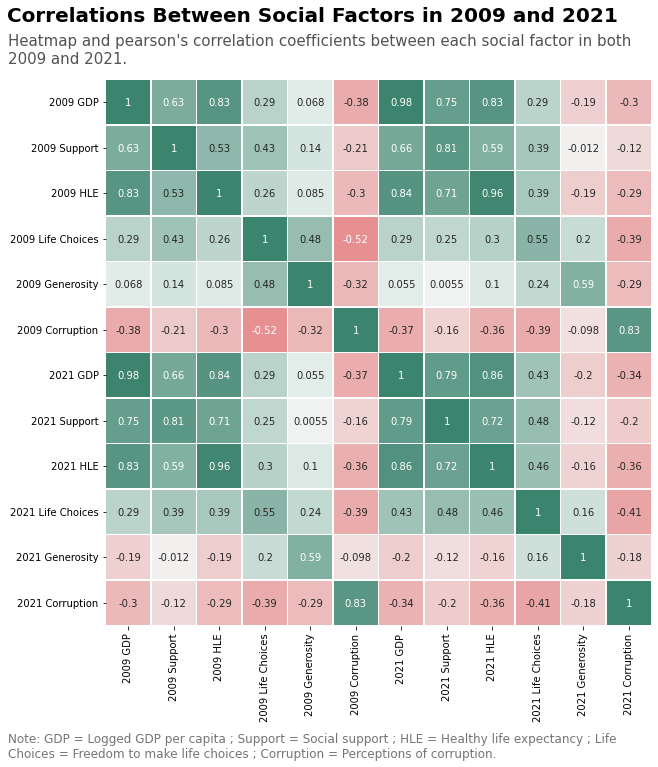

In [22]:
#Figure initialization
fig13 = plt.figure(figsize = (10, 9), constrained_layout=True)
gs = fig13.add_gridspec(1, 1)
gs.update(wspace=0.03, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.085, 'Correlations Between Social Factors in 2009 and 2021', fontsize = 20, fontfamily='sans-serif', fontweight='bold')
plt.figtext(0.004, 1.021, "Heatmap and pearson's correlation coefficients between each social factor in both \n2009 and 2021.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.004, -0.05, 'Note: GDP = Logged GDP per capita ; Support = Social support ; HLE = Healthy life expectancy ; Life \nChoices = Freedom to make life choices ; Corruption = Perceptions of corruption.', fontsize = 12, color = '#757575')

#Plot 1 Specifications
fig13_1 = fig13.add_subplot(gs[0, 0])
plt.title('')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sn.diverging_palette(12, 160, n=200), annot=True, square=True, linewidths=.5, cbar=False);

### ● Social Factors Distributions

In [23]:
df_Long.head()

,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country code,Continent code,Continent,Year
74,Peru,5.519,9.145,0.799,66.06,0.638,-0.079,0.880,PE,SA,South America,2009
108,Venezuela,7.189,9.542,0.945,65.64,0.677,-0.116,0.828,VE,SA,South America,2009
182,Paraguay,5.653,9.448,0.893,65.90,0.876,0.028,0.882,PY,SA,South America,2021
73,Paraguay,5.576,9.158,0.900,64.28,0.718,0.027,0.857,PY,SA,South America,2009
218,Venezuela,4.892,9.073,0.861,66.70,0.615,-0.169,0.827,VE,SA,South America,2021


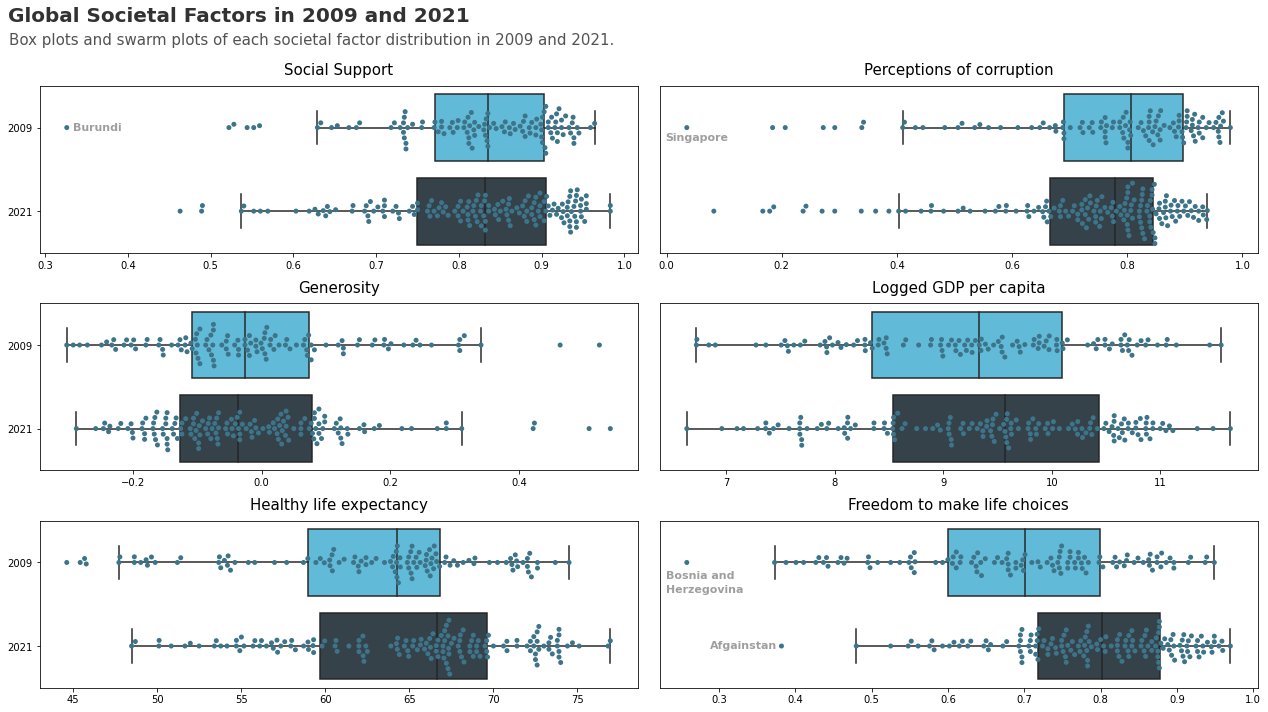

In [24]:
#Figure initialization
ax = plt.figure(figsize=(17.5,9), constrained_layout=True)
ax.patch.set_facecolor('#ffffff')
gs = ax.add_gridspec(3, 2)
gs.update(wspace=0.01, hspace=.07)

palette = {2009:'#4dc5ec', 2021:'#33424d'}

#Figure annotations
plt.figtext(0.003, 1.059, 'Global Societal Factors in 2009 and 2021',fontfamily='sans-serif',fontsize=20,fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Box plots and swarm plots of each societal factor distribution in 2009 and 2021.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.055, 0.8905, 'Burundi', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.525, 0.875, 'Singapore', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.525, 0.1999, 'Bosnia and', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.525, 0.1785, 'Herzegovina', fontsize = 11, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.56, 0.091, 'Afgainstan', fontsize = 11, fontweight='bold', color = '#9e9e9e')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0, 0])
plt.title('Social Support', size = 15, y = 1.03, fontname = 'sans-serif')
sn.boxplot(x='Social support', y='Year', data=df_Long, orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Social support', y='Year', data=df_Long, orient='h', color='#3d7489')
plt.ylabel('')
plt.xlabel('')

#Plot 2 specifications
ax2 = ax.add_subplot(gs[0, 1])
plt.title('Perceptions of corruption', size = 15, y = 1.03, fontname = 'sans-serif')
sn.boxplot(x='Perceptions of corruption', y='Year', data=df_Long, orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Perceptions of corruption', y='Year', data=df_Long, orient='h', color='#3d7489')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

#Plot 3 specifications
ax3 = ax.add_subplot(gs[1, 0])
plt.title('Generosity', size = 15, y = 1.03, fontname = 'sans-serif')
sn.boxplot(x='Generosity', y='Year', data=df_Long, orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Generosity', y='Year', data=df_Long, orient='h', color='#3d7489')
plt.ylabel('')
plt.xlabel('')

#Plot 4 specifications
ax4 = ax.add_subplot(gs[1, 1])
plt.title('Logged GDP per capita', size = 15, y = 1.03, fontname = 'sans-serif')
sn.boxplot(x='Logged GDP per capita', y='Year', data=df_Long, orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Logged GDP per capita', y='Year', data=df_Long, orient='h', color='#3d7489')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

#Plot 5 specifications
ax5 = ax.add_subplot(gs[2, 0])
plt.title('Healthy life expectancy', size = 15, y = 1.03, fontname = 'sans-serif')
sn.boxplot(x='Healthy life expectancy', y='Year', data=df_Long, orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Healthy life expectancy', y='Year', data=df_Long, orient='h', color='#3d7489')
plt.ylabel('')
plt.xlabel('')

#Plot 6 specifications
ax6 = ax.add_subplot(gs[2, 1])
plt.title('Freedom to make life choices', size = 15, y = 1.03, fontname = 'sans-serif')
sn.boxplot(x='Freedom to make life choices', y='Year', data=df_Long, orient='h', palette=palette, showfliers = False)
sn.swarmplot(x='Freedom to make life choices', y='Year', data=df_Long, orient='h', color='#3d7489')
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Societal Factors 2009&2021.png' , bbox_inches="tight", dpi=600)

### ● Changes In Social Factors From 2009 to 2021

In [25]:
#Calculating percent changes in social actors from 2009 to 2021
print ('Percent Changes in Societal Factors Fron 2009 to 2021:\n')
SUP_change = str(round((((df_2021['Social support'].mean() - df_2009['Social support'].mean()) / (df_2009['Social support'].mean())) * 100) , 2)) + '%'
print ('Social Support:', SUP_change, '\n')
GEN_change = '-' + str(round((((df_2021['Generosity'].mean() - df_2009['Generosity'].mean()) / (df_2009['Generosity'].mean())) * 100) , 2)) + '%'
print ('Generosity:', GEN_change, '\n')
GDP_change = '+' + str(round((((df_2021['Logged GDP per capita'].mean() - df_2009['Logged GDP per capita'].mean()) / (df_2009['Logged GDP per capita'].mean())) * 100) , 2)) + '%'
print ('Logged GDP per capita:', GDP_change, '\n')
HLE_change = '+' + str(round((((df_2021['Healthy life expectancy'].mean() - df_2009['Healthy life expectancy'].mean()) / (df_2009['Healthy life expectancy'].mean())) * 100) , 2)) + '%'
print ('Healthy life expectancy:', HLE_change, '\n')
FLC_change = '+' + str(round((((df_2021['Freedom to make life choices'].mean() - df_2009['Freedom to make life choices'].mean()) / (df_2009['Freedom to make life choices'].mean())) * 100) , 2)) + '%'
print ('Freedom to make life choices:', FLC_change, '\n')
POC_change = str(round((((df_2021['Perceptions of corruption'].mean() - df_2009['Perceptions of corruption'].mean()) / (df_2009['Perceptions of corruption'].mean())) * 100) , 2)) + '%'
print ('Perceptions of corruption:', POC_change, '\n')

Percent Changes in Societal Factors Fron 2009 to 2021:

Social Support: -0.52% 

Generosity: -135.27% 

Logged GDP per capita: +1.8% 

Healthy life expectancy: +4.14% 

Freedom to make life choices: +14.81% 

Perceptions of corruption: -4.64% 



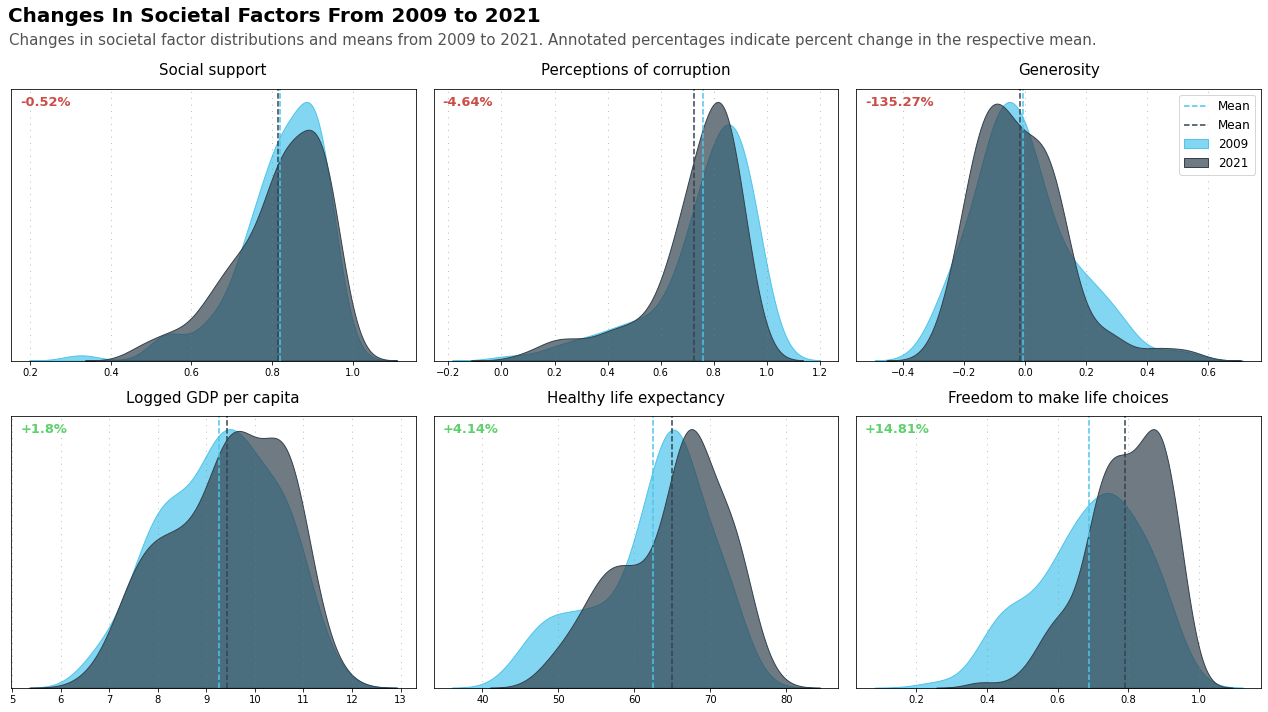

In [26]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 3)
gs.update(wspace=0.03, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, 'Changes In Societal Factors From 2009 to 2021', fontsize = 20, fontfamily='sans-serif', fontweight='bold')
plt.figtext(0.004, 1.024, 'Changes in societal factor distributions and means from 2009 to 2021. Annotated percentages indicate percent change in the respective mean.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.0128, 0.930, SUP_change, fontfamily='sans-serif', fontsize = 13, fontweight='bold',color = '#CB4D47')
plt.figtext(0.348, 0.930, POC_change, fontfamily='sans-serif', fontsize = 13, fontweight='bold',  color = '#CB4D47')
plt.figtext(0.683, 0.930, GEN_change, fontfamily='sans-serif', fontsize = 13, fontweight='bold',color = '#CB4D47')
plt.figtext(0.0128, 0.425, GDP_change, fontfamily='sans-serif', fontsize = 13, fontweight='bold', color = '#5ED06C')
plt.figtext(0.348, 0.425, HLE_change, fontfamily='sans-serif', fontsize = 13, fontweight='bold', color = '#5ED06C')
plt.figtext(0.683, 0.425, FLC_change, fontfamily='sans-serif', fontsize = 13, fontweight='bold',  color = '#5ED06C')


#Plot 1 Specifications
ax1 = ax.add_subplot(gs[0, 0])
plt.title('Social support', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Social support'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Social support'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Social support'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Social support'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 2 Specifications
ax2 = ax.add_subplot(gs[0, 1])
plt.title('Perceptions of corruption', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Perceptions of corruption'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Perceptions of corruption'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Perceptions of corruption'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Perceptions of corruption'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 3 Specifications
ax3 = ax.add_subplot(gs[0, 2])
plt.title('Generosity', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Generosity'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Generosity'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Generosity'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Generosity'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(['Mean', 'Mean', '2009', '2021'], loc="upper right", ncol = 1, frameon = True, fontsize = 12)

#Plot 4 Specifications
ax4 = ax.add_subplot(gs[1, 0])
plt.title('Logged GDP per capita', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Logged GDP per capita'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Logged GDP per capita'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Logged GDP per capita'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Logged GDP per capita'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 5 Specifications
ax5 = ax.add_subplot(gs[1, 1])
plt.title('Healthy life expectancy', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Healthy life expectancy'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Healthy life expectancy'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Healthy life expectancy'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Healthy life expectancy'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#Plot 6 Specifications
ax6 = ax.add_subplot(gs[1, 2])
plt.title('Freedom to make life choices', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
sn.kdeplot(df_2009['Freedom to make life choices'], color = '#4dc5ec', shade = True, alpha = 0.7)
plt.axvline(df_2009['Freedom to make life choices'].mean(), linestyle = '--', color = '#4dc5ec')
sn.kdeplot(df_2021['Freedom to make life choices'], color = '#33424d', shade = True, alpha = 0.7)
plt.axvline(df_2021['Freedom to make life choices'].mean(), linestyle = '--', color = '#33424d')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Societal Factor Changes.png' , bbox_inches="tight", dpi=600)

### ● Social Factors in Happy vs. Unhappy Countries: 2009 & 2021

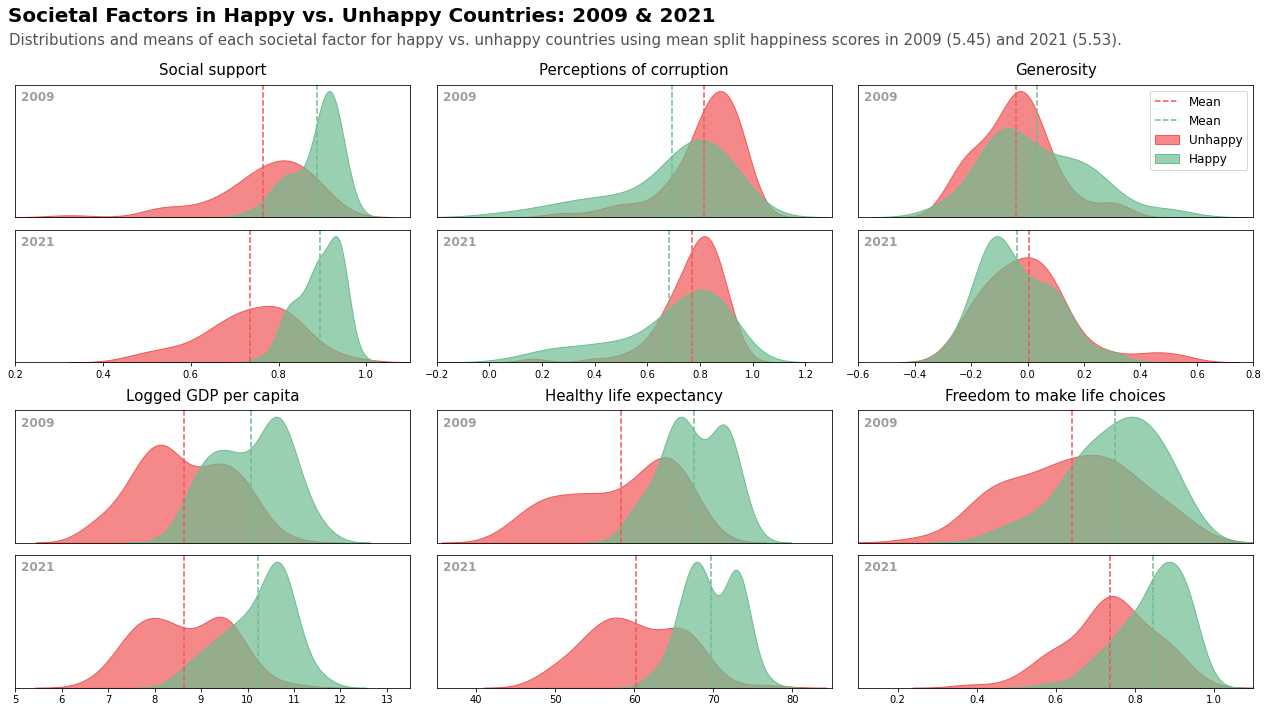

In [27]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(4, 3)
gs.update(wspace=0.01, hspace=.04)

#Figure annotations
plt.figtext(0.003, 1.059, 'Societal Factors in Happy vs. Unhappy Countries: 2009 & 2021', fontsize = 20, fontfamily='sans-serif', fontweight='bold')
plt.figtext(0.004, 1.024, 'Distributions and means of each societal factor for happy vs. unhappy countries using mean split happiness scores in 2009 (5.45) and 2021 (5.53).', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.013, 0.938, '2009', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.013, 0.714, '2021', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.348, 0.938, '2009', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.348, 0.714, '2021', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.682, 0.938, '2009', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.682, 0.714, '2021', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.013, 0.435, '2009', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.013, 0.212, '2021', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.348, 0.435, '2009', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.348, 0.212, '2021', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.682, 0.435, '2009', fontsize = 12, fontweight='bold', color = '#9e9e9e')
plt.figtext(0.682, 0.212, '2021', fontsize = 12, fontweight='bold', color = '#9e9e9e')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0, 0])
plt.title('Social support', size = 15, y = 1.03)
sn.kdeplot(df_2009_below_mean['Social support'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2009_below_mean['Social support'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2009_above_mean['Social support'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2009_above_mean['Social support'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
ax1.set_xlim(0.2,1.1)

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1, 0])
plt.title('', size = 15, y = 1.03)
sn.kdeplot(df_2021_below_mean['Social support'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2021_below_mean['Social support'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2021_above_mean['Social support'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2021_above_mean['Social support'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
ax2.set_xlim(0.2,1.1)

#Plot 3 specifications
ax3 = ax.add_subplot(gs[0, 1])
plt.title('Perceptions of corruption', size = 15, y = 1.03)
sn.kdeplot(df_2009_below_mean['Perceptions of corruption'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2009_below_mean['Perceptions of corruption'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2009_above_mean['Perceptions of corruption'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2009_above_mean['Perceptions of corruption'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
ax3.set_xlim(-0.2,1.3)

#Plot 4 specifications
ax4 = ax.add_subplot(gs[1, 1])
plt.title('', size = 15, y = 1.03)
sn.kdeplot(df_2021_below_mean['Perceptions of corruption'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2021_below_mean['Perceptions of corruption'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2021_above_mean['Perceptions of corruption'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2021_above_mean['Perceptions of corruption'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
ax4.set_xlim(-0.2,1.3)

#Plot 5 specifications
ax5 = ax.add_subplot(gs[0, 2])
plt.title('Generosity', size = 15, y = 1.03)
sn.kdeplot(df_2009_below_mean['Generosity'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2009_below_mean['Generosity'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2009_above_mean['Generosity'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2009_above_mean['Generosity'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
ax5.set_xlim(-0.6,0.8)
plt.legend(['Mean', 'Mean', 'Unhappy', 'Happy'], loc="upper right", ncol = 1, frameon = True, fontsize = 12)

#Plot  specifications
ax6 = ax.add_subplot(gs[1, 2])
plt.title('', size = 15, y = 1.03)
sn.kdeplot(df_2021_below_mean['Generosity'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2021_below_mean['Generosity'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2021_above_mean['Generosity'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2021_above_mean['Generosity'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
ax6.set_xlim(-0.6,0.8)

#Plot 7 speci1ications
ax7 = ax.add_subplot(gs[2, 0])
plt.title('Logged GDP per capita', size = 15, y = 1.03)
sn.kdeplot(df_2009_below_mean['Logged GDP per capita'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2009_below_mean['Logged GDP per capita'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2009_above_mean['Logged GDP per capita'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2009_above_mean['Logged GDP per capita'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
ax7.set_xlim(5,13.5)

#Plot 8 specifications
ax8 = ax.add_subplot(gs[3, 0])
plt.title('', size = 15, y = 1.03)
sn.kdeplot(df_2021_below_mean['Logged GDP per capita'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2021_below_mean['Logged GDP per capita'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2021_above_mean['Logged GDP per capita'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2021_above_mean['Logged GDP per capita'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
ax8.set_xlim(5,13.5)

#Plot 9 specifications
ax9 = ax.add_subplot(gs[2, 1])
plt.title('Healthy life expectancy', size = 15, y = 1.03)
sn.kdeplot(df_2009_below_mean['Healthy life expectancy'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2009_below_mean['Healthy life expectancy'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2009_above_mean['Healthy life expectancy'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2009_above_mean['Healthy life expectancy'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
ax9.set_xlim(35,85)

#Plot 10 specifications
ax10 = ax.add_subplot(gs[3, 1])
plt.title('', size = 15, y = 1.03)
sn.kdeplot(df_2021_below_mean['Healthy life expectancy'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2021_below_mean['Healthy life expectancy'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2021_above_mean['Healthy life expectancy'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2021_above_mean['Healthy life expectancy'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
ax10.set_xlim(35,85)

#Plot 11 specifications
ax11 = ax.add_subplot(gs[2, 2])
plt.title('Freedom to make life choices', size = 15, y = 1.03)
sn.kdeplot(df_2009_below_mean['Freedom to make life choices'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2009_below_mean['Freedom to make life choices'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2009_above_mean['Freedom to make life choices'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2009_above_mean['Freedom to make life choices'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
ax11.set_xlim(0.1,1.1)

#Plot 12 specifications
ax12 = ax.add_subplot(gs[3, 2])
plt.title('', size = 15, y = 1.03)
sn.kdeplot(df_2021_below_mean['Freedom to make life choices'], color = '#f25757', shade = True, alpha = 0.7)
plt.axvline(df_2021_below_mean['Freedom to make life choices'].mean(), linestyle = '--', color = '#f25757')
sn.kdeplot(df_2021_above_mean['Freedom to make life choices'], color = '#6CBD90', shade = True, alpha = 0.7)
plt.axvline(df_2021_above_mean['Freedom to make life choices'].mean(), linestyle = '--', color = '#6CBD90')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
ax12.set_xlim(0.1,1.1);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Happy vs Unhappy Societal Factors 2009&2021.png' , bbox_inches="tight", dpi=600)

### ● Associations Between Social Factors & Happiness: 2009 & 2021

In [28]:
#Calculating pearson's correlation coeffcients between social facotrs and happiness
print('Societal Factor Correlations With Happiness:\n')
corr, _ = pearsonr(df_2009['Social support'],df_2009['Happiness score'])
SUP_corr_2009 = 'r = ' + str(round(corr, 2))
print('2009 Social Support:', SUP_corr_2009)
corr, _ = pearsonr(df_2021['Social support'],df_2021['Happiness score'])
SUP_corr_2021 = 'r = ' + str(round(corr, 2))
print('2021 Social Support:', SUP_corr_2021, '\n')
corr, _ = pearsonr(df_2009['Perceptions of corruption'],df_2009['Happiness score'])
POC_corr_2009 = 'r = ' + str(round(corr, 2))
print('2009 Perceptions of corruption:', POC_corr_2009)
corr, _ = pearsonr(df_2021['Perceptions of corruption'],df_2021['Happiness score'])
POC_corr_2021 = 'r = ' + str(round(corr, 2))
print('2021 Perceptions of corruption:', POC_corr_2021, '\n')
corr, _ = pearsonr(df_2009['Generosity'],df_2009['Happiness score'])
GEN_corr_2009 = 'r = ' + str(round(corr, 2))
print('2009 Generosity:', GEN_corr_2009)
corr, _ = pearsonr(df_2021['Generosity'],df_2021['Happiness score'])
GEN_corr_2021 = 'r = ' + str(round(corr, 2))
print('2021 Generosity:', GEN_corr_2021, '\n')
corr, _ = pearsonr(df_2009['Logged GDP per capita'],df_2009['Happiness score'])
GDP_corr_2009 = 'r = ' + str(round(corr, 2))
print('2009 Logged GDP per capita:', GDP_corr_2009)
corr, _ = pearsonr(df_2021['Logged GDP per capita'],df_2021['Happiness score'])
GDP_corr_2021 = 'r = ' + str(round(corr, 2))
print('2021 Logged GDP per capita:', GDP_corr_2021, '\n')
corr, _ = pearsonr(df_2009['Healthy life expectancy'],df_2009['Happiness score'])
HLE_corr_2009 = 'r = ' + str(round(corr, 2))
print('2009 Healthy life expectancy:', HLE_corr_2009)
corr, _ = pearsonr(df_2021['Healthy life expectancy'],df_2021['Happiness score'])
HLE_corr_2021 = 'r = ' + str(round(corr, 2))
print('2021 Healthy life expectancy:', HLE_corr_2021, '\n')
corr, _ = pearsonr(df_2009['Freedom to make life choices'],df_2009['Happiness score'])
FLC_corr_2009 = 'r = ' + str(round(corr, 2))
print('2009 Freedom to make life choices:', FLC_corr_2009)
corr, _ = pearsonr(df_2021['Freedom to make life choices'],df_2021['Happiness score'])
FLC_corr_2021 = 'r = ' + str(round(corr, 2))
print('2021 Freedom to make life choices:', FLC_corr_2021, '\n')

Societal Factor Correlations With Happiness:

2009 Social Support: r = 0.64
2021 Social Support: r = 0.76 

2009 Perceptions of corruption: r = -0.39
2021 Perceptions of corruption: r = -0.43 

2009 Generosity: r = 0.25
2021 Generosity: r = -0.03 

2009 Logged GDP per capita: r = 0.72
2021 Logged GDP per capita: r = 0.79 

2009 Healthy life expectancy: r = 0.69
2021 Healthy life expectancy: r = 0.77 

2009 Freedom to make life choices: r = 0.47
2021 Freedom to make life choices: r = 0.61 



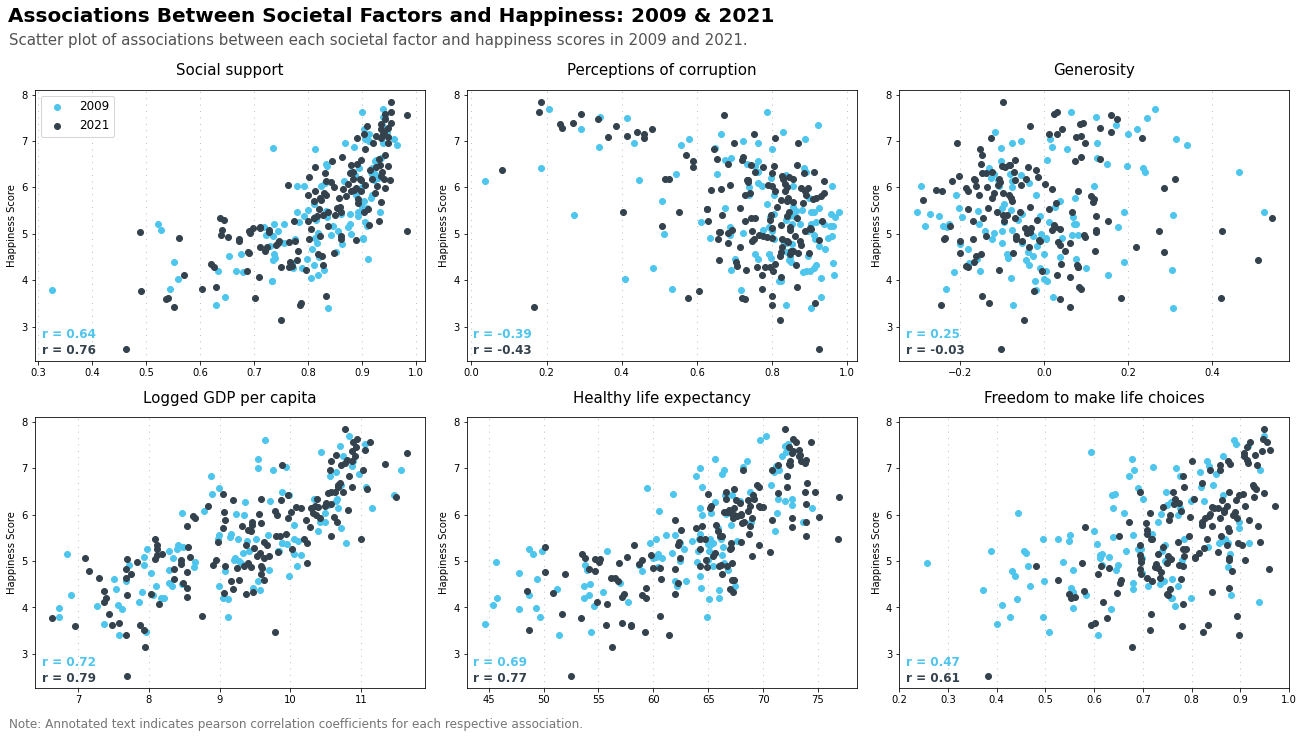

In [29]:
#Figure initialization
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 3)
gs.update(wspace=0.03, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, 'Associations Between Societal Factors and Happiness: 2009 & 2021', fontsize = 20, fontfamily='sans-serif', fontweight='bold')
plt.figtext(0.004, 1.024, 'Scatter plot of associations between each societal factor and happiness scores in 2009 and 2021.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.0295, 0.572, SUP_corr_2009, fontsize = 12, fontweight='bold', color = '#4dc5ec')
plt.figtext(0.0295, 0.547, SUP_corr_2021, fontsize = 12, fontweight='bold', color = '#33424d')
plt.figtext(0.362, 0.572, POC_corr_2009, fontsize = 12, fontweight='bold', color = '#4dc5ec')
plt.figtext(0.362, 0.547, POC_corr_2021, fontsize = 12, fontweight='bold', color = '#33424d')
plt.figtext(0.696, 0.572, GEN_corr_2009, fontsize = 12, fontweight='bold', color = '#4dc5ec')
plt.figtext(0.696, 0.547, GEN_corr_2021, fontsize = 12, fontweight='bold', color = '#33424d')
plt.figtext(0.0295, 0.066, GDP_corr_2009, fontsize = 12, fontweight='bold', color = '#4dc5ec')
plt.figtext(0.0295, 0.041, GDP_corr_2021, fontsize = 12, fontweight='bold', color = '#33424d')
plt.figtext(0.362, 0.066, HLE_corr_2009, fontsize = 12, fontweight='bold', color = '#4dc5ec')
plt.figtext(0.362, 0.041, HLE_corr_2021, fontsize = 12, fontweight='bold', color = '#33424d')
plt.figtext(0.696, 0.066, FLC_corr_2009, fontsize = 12, fontweight='bold', color = '#4dc5ec')
plt.figtext(0.696, 0.041, FLC_corr_2021, fontsize = 12, fontweight='bold', color = '#33424d')

plt.figtext(0.004, -0.03, 'Note: Annotated text indicates pearson correlation coefficients for each respective association.', fontsize = 12, color = '#757575')

#Plot 1 Specifications
ax1 = ax.add_subplot(gs[0, 0])
plt.title('Social support', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(df_2009['Social support'],df_2009['Happiness score'], color = '#4dc5ec')
plt.scatter(df_2021['Social support'],df_2021['Happiness score'], color = '#33424d')
plt.xlabel('')
plt.ylabel('Happiness Score')
plt.legend(['' '2009', '2021'], loc="upper left", ncol = 1, frameon = True, fontsize = 12)

#Plot 2 Specifications
ax2 = ax.add_subplot(gs[0, 1])
plt.title('Perceptions of corruption', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(df_2009['Perceptions of corruption'],df_2009['Happiness score'], color = '#4dc5ec')
plt.scatter(df_2021['Perceptions of corruption'],df_2021['Happiness score'], color = '#33424d')
plt.xlabel('')
plt.ylabel('Happiness Score')

#Plot 3 Specifications
ax3 = ax.add_subplot(gs[0, 2])
plt.title('Generosity', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(df_2009['Generosity'],df_2009['Happiness score'], color = '#4dc5ec')
plt.scatter(df_2021['Generosity'],df_2021['Happiness score'], color = '#33424d')
plt.xlabel('')
plt.ylabel('Happiness Score')

#Plot 4 Specifications
ax4 = ax.add_subplot(gs[1, 0])
plt.title('Logged GDP per capita', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(df_2009['Logged GDP per capita'],df_2009['Happiness score'], color = '#4dc5ec')
plt.scatter(df_2021['Logged GDP per capita'],df_2021['Happiness score'], color = '#33424d')
plt.xlabel('')
plt.ylabel('Happiness Score')

#Plot 5 Specifications
ax5 = ax.add_subplot(gs[1, 1])
plt.title('Healthy life expectancy', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(df_2009['Healthy life expectancy'],df_2009['Happiness score'], color = '#4dc5ec')
plt.scatter(df_2021['Healthy life expectancy'],df_2021['Happiness score'], color = '#33424d')
plt.xlabel('')
plt.ylabel('Happiness Score')

#Plot 6 Specifications
ax6 = ax.add_subplot(gs[1, 2])
plt.title('Freedom to make life choices', size = 15, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(df_2009['Freedom to make life choices'],df_2009['Happiness score'], color = '#4dc5ec')
plt.scatter(df_2021['Freedom to make life choices'],df_2021['Happiness score'], color = '#33424d')
plt.xlabel('')
plt.xlim(0.2, 1)
plt.ylabel('Happiness Score')

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Societal Factor Associations.png' , bbox_inches="tight", dpi=600)


# Predictive Analysis
_____________________

In [30]:
# Given the lack of correlation and outliers in the generosity and PoC, only SS, GSP, HLE FLC

###2009 Predicting Happiness Scores

In [31]:
X = df_2021[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
Y = df_2021['Happiness score']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=11)
model = LinearRegression()
model.fit(x_train, y_train)
fitted = model.predict(x_test)

In [33]:
print(f'Model Intercept: {model.intercept_:.2f}')
print(f'Model Coefficients: {model.coef_}')

Model Intercept: -2.42
Model Coefficients: [0.32175341 2.05776535 0.02155084 2.30817452]


In [34]:
print(f'Root Mean squared error (RMSE): {mean_squared_error(y_test, fitted, squared=False):.2f}')
print(f'Mean squared error (MSE): {mean_squared_error(y_test, fitted, squared=True):.2f}')
print(f'Train Coefficient of determination (R^2): {model.score(x_train, y_train):.2f}')
print(f'Test Coefficient of determination (R^2): {r2_score(y_test, fitted):.2f}')
#Proportion of variation in the data that is accounted for in the model

Root Mean squared error (RMSE): 0.59
Mean squared error (MSE): 0.35
Train Coefficient of determination (R^2): 0.72
Test Coefficient of determination (R^2): 0.80


In [35]:
# Crossvalidation Using K-folds
# Examining multiple holdout samples

scores=[]
for k in range(0,11):
    KFolds = KFold(n_splits=k+2, random_state=11, shuffle=True)
    score=cross_val_score(model, x_train, y_train,scoring='r2', cv=KFolds)
    scores.append(mean(score))
folds=pd.DataFrame()
folds['K-Folds']=list(range(2,13))
folds['scores']=scores
print(folds)

print('\nAverage R-Squared Score: %2.4f' % (mean(scores)))
print('Maximum R-Squared Score: %2.4f' % (max(scores)))
print('Minimum R-Squared Score: %2.4f' % (min(scores)))

    K-Folds    scores
0         2  0.679194
1         3  0.672508
2         4  0.619102
3         5  0.659408
4         6  0.611334
5         7  0.645823
6         8  0.621924
7         9  0.533449
8        10  0.580455
9        11  0.557632
10       12  0.588173

Average R-Squared Score: 0.6154
Maximum R-Squared Score: 0.6792
Minimum R-Squared Score: 0.5334


In [36]:
residuals = fitted - y_test

Text(0, 0.5, '')

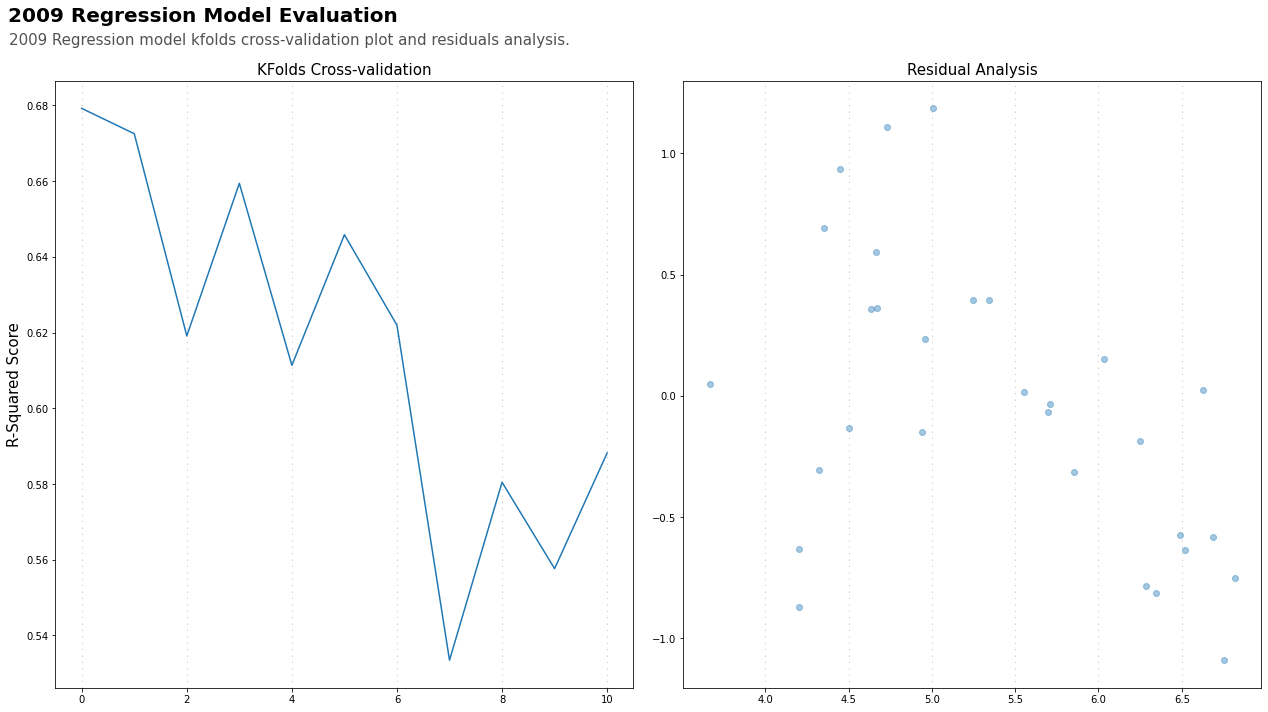

In [37]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(1, 2)
gs.update(wspace=0.03, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, '2009 Regression Model Evaluation', fontsize = 20, fontfamily='sans-serif', fontweight='bold')
plt.figtext(0.004, 1.024, '2009 Regression model kfolds cross-validation plot and residuals analysis.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 Specifications
ax1 = ax.add_subplot(gs[0, 0])
plt.title('KFolds Cross-validation', size = 15)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.plot(scores)
plt.xlabel('')
plt.ylabel('R-Squared Score', fontfamily='sans-serif', fontsize=15)

#Plot 2 Specifications
ax2 = ax.add_subplot(gs[0, 1])
plt.title('Residual Analysis', size = 15)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(fitted, residuals, alpha=0.4)
plt.xlabel('')
plt.ylabel('')

###2021 Predicting Happiness Scores

In [38]:
X = df_2021[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
Y = df_2021['Happiness score']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=11)
model = LinearRegression()
model.fit(x_train, y_train)
fitted = model.predict(x_test)

In [40]:
print(f'Model Intercept: {model.intercept_:.2f}')
print(f'Model Coefficients: {model.coef_}')

Model Intercept: -2.42
Model Coefficients: [0.32175341 2.05776535 0.02155084 2.30817452]


In [41]:
print(f'Root Mean squared error (RMSE): {mean_squared_error(y_test, fitted, squared=False):.2f}')
print(f'Mean squared error (MSE): {mean_squared_error(y_test, fitted, squared=True):.2f}')
print(f'Train Coefficient of determination (R^2): {model.score(x_train, y_train):.2f}')
print(f'Test Coefficient of determination (R^2): {r2_score(y_test, fitted):.2f}')
#Proportion of variation in the data that is accounted for in the model

Root Mean squared error (RMSE): 0.59
Mean squared error (MSE): 0.35
Train Coefficient of determination (R^2): 0.72
Test Coefficient of determination (R^2): 0.80


In [42]:
# Crossvalidation Using K-folds
# Examining multiple holdout samples

scores=[]
for k in range(0,11):
    KFolds = KFold(n_splits=k+2, random_state=11, shuffle=True)
    score=cross_val_score(model, x_train, y_train,scoring='r2', cv=KFolds)
    scores.append(mean(score))
folds=pd.DataFrame()
folds['K-Folds']=list(range(2,13))
folds['scores']=scores
print(folds)

print('\nAverage R-Squared Score: %2.4f' % (mean(scores)))
print('Maximum R-Squared Score: %2.4f' % (max(scores)))
print('Minimum R-Squared Score: %2.4f' % (min(scores)))

    K-Folds    scores
0         2  0.679194
1         3  0.672508
2         4  0.619102
3         5  0.659408
4         6  0.611334
5         7  0.645823
6         8  0.621924
7         9  0.533449
8        10  0.580455
9        11  0.557632
10       12  0.588173

Average R-Squared Score: 0.6154
Maximum R-Squared Score: 0.6792
Minimum R-Squared Score: 0.5334


In [43]:
residuals = fitted - y_test

Text(0, 0.5, '')

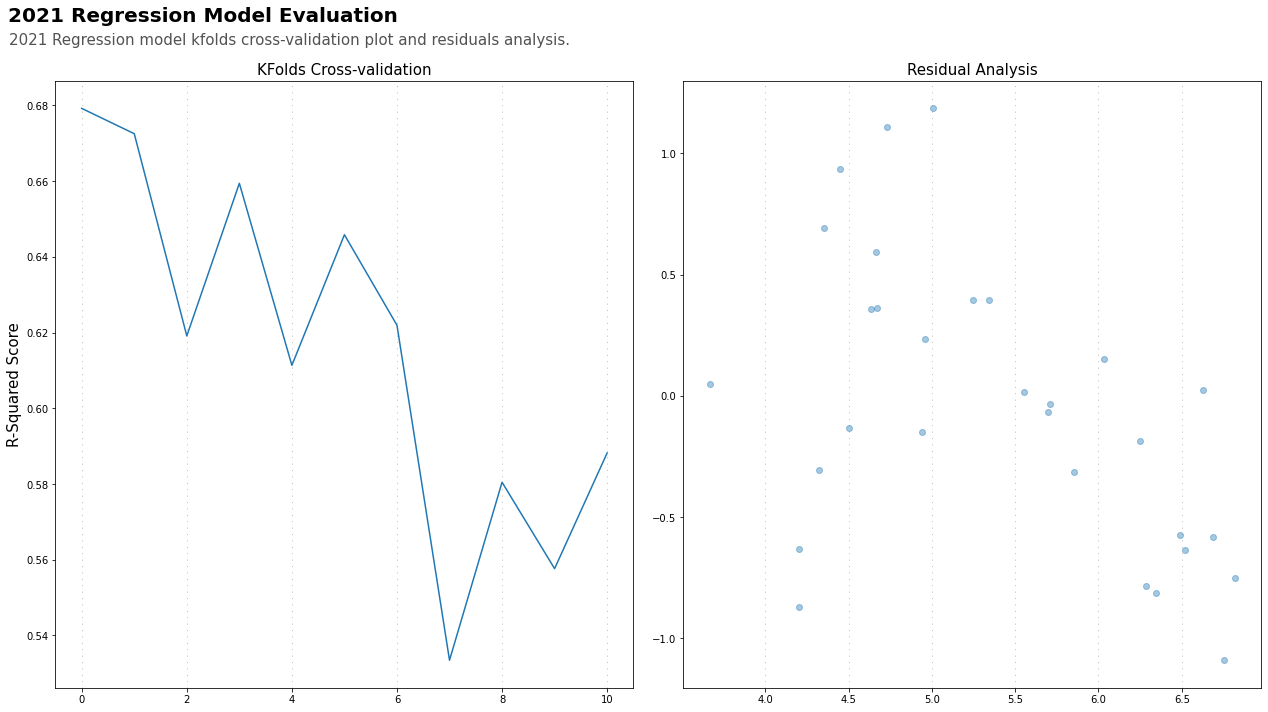

In [44]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(1, 2)
gs.update(wspace=0.03, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059, '2021 Regression Model Evaluation', fontsize = 20, fontfamily='sans-serif', fontweight='bold')
plt.figtext(0.004, 1.024, '2021 Regression model kfolds cross-validation plot and residuals analysis.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 Specifications
ax1 = ax.add_subplot(gs[0, 0])
plt.title('KFolds Cross-validation', size = 15)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.plot(scores)
plt.xlabel('')
plt.ylabel('R-Squared Score', fontfamily='sans-serif', fontsize=15)

#Plot 2 Specifications
ax2 = ax.add_subplot(gs[0, 1])
plt.title('Residual Analysis', size = 15)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 0.8, zorder = 0,  dashes = (1,7))
plt.scatter(fitted, residuals, alpha=0.4)
plt.xlabel('')
plt.ylabel('')